# Orbita de Mercuio
Potencial efectivo:
$$
V_{\text{efectivo}} = - \frac{GM}{r} + \frac{L^2}{2 m^2 r^2} - \frac{GM}{c^2} \frac{L^2}{m^2 r^3}
$$

usando $l = L/m$

$$
V_{\text{efectivo}}= - \frac{GM}{r} + \frac{\mathcal{l}}{2 r^2} - \frac{GM}{c^2} \frac{\mathcal l}{ r^3}
$$

definiendo el radio especial: $r_s = \frac{2GM}{c^2}$

Así la ecuación para la orbita de mercurio
$$
\frac{dr}{d\tau}_{r_n, \phi_n} = \pm \sqrt{  \mathcal E^2 - c^2
+ \frac{GM}{r} - \frac{l^2}{2 r^2} + \frac{r_s}{2} \frac{l^2}{r^3}
}
$$

$$
\frac{d \phi}{d\tau}_{r_n, \phi_n} = \frac{l}{r_n^2}
$$

$$
\mathcal E = (1 - \frac{r_s}{r}) c \gamma
$$

donde $\gamma$ es el factor de corrección relativista

$$
\gamma = \frac{1}{ \sqrt{1 - \frac{v^2}{c^2}} }
$$


In [82]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np

e = 0.205
a = 5.79 # x 10^10 [m]

# c = 3e8
#l = 2.71e15
#G = 6.67e-11

G = 1
c = 1
# l = (1-e) * np.sqrt(a) * 10
l = 1

M = 0.2 #sol
r_s =  2 * G* M /c**2

# condiciones iniciales
r0 = 2.5
v0 = 0.4


gamma = lambda v: 1/np.sqrt(1 - (v/c)**2)
E_ = lambda r,v: (1 - r_s / r) * c * gamma(v)


#E = E_(r0, v0)
E = 1

In [75]:
def Veff_rel(r,l):
    return - G * M /r + l**2 /( 2 * r**2) - G * M * l**2 /(c**2 * r**3)

def Veff_newt(r,l):
    return -G*M/r + l**2/(2*r**2)

def dr_dtau(E,r,signo, Veff,l):
    return signo * np.sqrt( E**2 - c**2 - Veff(r,l) )


def dphi_dtau(r):
    return l / r**2


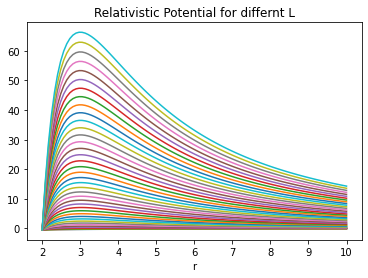

In [77]:
import matplotlib.pyplot as plt
import numpy as np

r_list = np.linspace(r_s,10, 100)
l_list = np.linspace(0, 60, 40)

for l_ in l_list:
    plt.plot(r_list,Veff_rel(r_list,l_))
plt.title("Relativistic Potential for differnt L")
plt.xlabel("r")
plt.show()

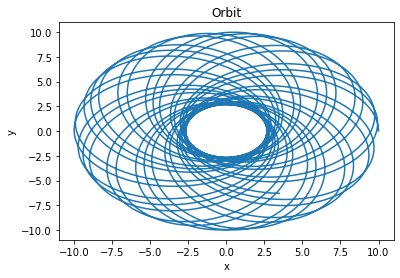

In [107]:
import numpy as np
import matplotlib.pyplot as plt

def f1(theta, u, G, M, L):
    result = (3 * G*G * M*M / (L*L) * u*u - u + 1)
    return result

def f2(theta, uh):
    result = uh
    return result

def integracion_heun(N, G, M, L, E, u0, uh0, theta0, dtheta):
    # Start calculations
    theta = theta0
    u = u0
    uh = uh0
    r = L*L / (G * M * u)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    t = 0

    # Create arrays to store position data
    x_arr = np.zeros(N)
    y_arr = np.zeros(N)

    r_arr = np.zeros(N)
    theta_arr = np.zeros(N)
    t_arr = np.zeros(N)

    # Evolve orbit
    for i in range(N):
        # Advance step
        u_o = u
        uh_o = uh
        h = dtheta

        # Integration using the method of Heun
        uh_hat = uh_o + h*f1(theta, u_o, G, M, L)
        u = u_o + 0.5*h*(f2(theta, uh_o) + f2(theta, uh_hat))

        u_hat = u_o + h*f2(theta, uh_o)
        uh = uh_o + 0.5*h*(f1(theta, u_o, G, M, L) + f1(theta, u_hat, G, M, L))

        # Compute radial coordinate
        r = L * L / (G * M * u)

        # Compute time coordinate
        d_tau = r * r * dtheta / L
        dt = E * d_tau / (1.0 - 2 * G * M / r)

        t = t + dt

        # Compute Cartesian coordinates
        x = r * np.cos(theta)
        y = r * np.sin(theta)

        # Save position data
        x_arr[i] = x
        y_arr[i] = y
        t_arr[i] = t

        r_arr[i] = r
        theta_arr[i] = theta

        # Update angle
        theta = theta + dtheta

    # Plot results
    plt.plot(x_arr, y_arr)
    plt.title("Orbit")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

    return t_arr, r_arr, theta_arr



# Parameters
N = 5*8000      # Number of steps
G = 1.0         # Gravitational constant
M = 0.2         # Mass of gravitating object
L = 1.0         # Angular momentum of orbiting object
E = 1.0         # Energy of orbiting object
u0 = 0.5        # Initial inverse radius test particle
uh0 = 0.0       # Initial derivative inverse radius wrt theta
theta0 = 0      # Initial angle test particle
dtheta = 0.005  # Step size


t, r, theta = integracion_heun(N, G, M, L, E, u0, uh0, theta0, dtheta)


In [111]:
# exportas los datos creados:
import pandas as pd

datos = pd.DataFrame({"t":t,"r":r,"theta":theta})

datos.to_csv("./orbits/heun_E1L1.csv")

___